In [79]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [80]:
house_prices=pd.read_csv('Auckland_House_Prices.csv')

In [21]:
house_prices

Bedrooms  Bathrooms                                          Address  \
0            5        3.0        106 Lawrence Crescent Hill Park, Auckland   
1            5        3.0                   8 Corsica Way Karaka, Auckland   
2            6        4.0           243 Harbourside Drive Karaka, Auckland   
3            2        1.0        2/30 Hardington Street Onehunga, Auckland   
4            3        1.0           59 Israel Avenue Clover Park, Auckland   
5            3        1.0       14 Tainui Terrace Mangere Bridge, Auckland   
6            3        1.0            54 Kelmarna Avenue Ponsonby, Auckland   
7            3        2.0          39 Rawhiti Road One Tree Hill, Auckland   
8            3        2.0             17b Tawa Crescent Manurewa, Auckland   
9            4        2.0                39a Keegan Drive Massey, Auckland   
10           4        2.0                39c Keegan Drive Massey, Auckland   
11           4        2.0                39b Keegan Drive Massey, Auckland   
12           3        1.0                9 Menear Lane Hillcrest, Auckland   
13           3        1.0            10 Fairlight Place Manurewa, Auckland   
14           4        2.0               11 Arran Drive Millwater, Auckland   
15           3        1.0   53a Kimber Hall Avenue Mount Roskill, Auckland   
16           2        1.0  1/77 Kimber Hall Avenue Mount Roskill, Auckland   
17           5        3.0     42 Johns Creek Crescent Silverdale, Auckland   
18           5        3.0             4 Ahorangi Road Silverdale, Auckland   
19           5        3.0     32 Johns Creek Crescent Silverdale, Auckland   
20           3        1.0           577 Mt Albert Road Royal Oak, Auckland   
21           5        4.0        109 Aberley Road Schnapper Rock, Auckland   
22           4        2.0               19 Kenley Place Avondale, Auckland   
23           3        1.0            27 Stottholm Road Titirangi, Auckland   
24           3        1.0              71 First Avenue Kingsland, Auckland   
25           3        2.0     17 Dalwhinnie Parade Highland Park, Auckland   
26           3        2.0         24a Roberts Road Matakatia Bay, Auckland   
27           2        1.0      72 Stonefields Avenue Stonefields, Auckland   
28           3        1.0        62 Richardson Road Mount Albert, Auckland   
29           3        2.0        47b Comins Crescent Mission Bay, Auckland   
...        ...        ...                                              ...   
1021         4        3.0                      18a Campbell Road, Auckland   
1022         5        3.0                      62A Maioro Street, Auckland   
1023         5        3.0                         9 Waitara Road, Auckland   
1024         5        3.0                       13B Waitara Road, Auckland   
1025         5        3.0                         5 Waitara Road, Auckland   
1026         4        2.0                      498A Remuera Road, Auckland   
1027         3        1.0                           5 Parry Road, Auckland   
1028         4        2.0                        82 Gowing Drive, Auckland   
1029         6        4.0                          43 Arney Road, Auckland   
1030         4        2.0                         55A Arney Road, Auckland   
1031         3        2.0               Lot 1  6/22 Ngaio Street, Auckland   
1032         4        2.0               167B Blockhouse Bay Road, Auckland   
1033         3        1.0                      133 Mt Smart Road, Auckland   
1034         4        2.0                       67 Balmoral Road, Auckland   
1035         4        2.0                      42B Marion Avenue, Auckland   
1036         5        2.0                       23 Stoddard Road, Auckland   
1037         5        3.0                    246 Victoria Avenue, Auckland   
1038         5        2.0                       23 Wapiti Avenue, Auckland   
1039         5        6.0                       57 Portland Road, Auckland   
1040         5        3.0   

In [4]:
house_prices['Land area'] = house_prices['Land area'].str.extract('(\d+)').astype(float)

In [5]:
house_prices.describe()

Bedrooms    Bathrooms     Land area            CV     Latitude  \
count  1051.000000  1049.000000   1051.000000  1.051000e+03  1051.000000   
mean      3.777355     2.073403    856.989534  1.387521e+06   -36.893715   
std       1.169412     0.992985   1588.156219  1.182939e+06     0.130100   
min       1.000000     1.000000     40.000000  2.700000e+05   -37.265021   
25%       3.000000     1.000000    321.000000  7.800000e+05   -36.950565   
50%       4.000000     2.000000    571.000000  1.080000e+06   -36.893132   
75%       4.000000     3.000000    825.000000  1.600000e+06   -36.855789   
max      17.000000     8.000000  22240.000000  1.800000e+07   -36.177655   

         Longitude           SA1   0-19 years  20-29 years  30-39 years  \
count  1051.000000  1.051000e+03  1051.000000  1051.000000  1051.000000   
mean    174.799325  7.006319e+06    47.549001    28.963844    27.042816   
std       0.119538  2.591262e+03    24.692205    21.037441    17.975408   
min     174.317078  7.001130e+06     0.000000     0.000000     0.000000   
25%     174.720779  7.004416e+06    33.000000    15.000000    15.000000   
50%     174.798575  7.006325e+06    45.000000    24.000000    24.000000   
75%     174.880944  7.008384e+06    57.000000    36.000000    33.000000   
max     175.492424  7.011028e+06   201.000000   270.000000   177.000000   

       40-49 years  50-59 years    60+ years  
count  1051.000000  1051.000000  1051.000000  
mean     24.125595    22.615604    29.360609  
std      10.942770    10.210578    21.805031  
min       0.000000     0.000000     0.000000  
25%      18.000000    15.000000    18.000000  
50%      24.000000    21.000000    27.000000  
75%      30.000000    27.000000    36.000000  
max     114.000000    90.000000   483.000000

After using the describe function on the dataset we can see the summary statistic for each attribute (column). There are some houses with up to 17 bedrooms, which can be considered as an outlier.

In [6]:
import json
import sys
import requests 

In [34]:
def get_census_population(longitude, latitude):
    
    url = 'https://koordinates.com/services/query/v1/vector.json'
    
    params={
        'key':'14ecc6b43e324cebbae0c87fce31d293',
        'layer':'104612',
        'x':longitude,
        'y':latitude
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        return pd.Series({'Census Population':response.status_code})
    
    census_population=response.json()['vectorQuery']['layers']['104612']['features'][0]['properties']['C18_CURPop']
    return pd.Series({'Census Population':census_population})


In [35]:
type(house_prices.Longitude)

pandas.core.series.Series

In [36]:
type(house_prices.Latitude)

pandas.core.series.Series

In [37]:
house_prices['Census Population']=house_prices.apply(lambda row: get_census_population(row['Longitude'], row['Latitude']), axis=1)

In [38]:
house_prices.head()

Bedrooms  Bathrooms                                    Address  Land area  \
0         5        3.0  106 Lawrence Crescent Hill Park, Auckland      714.0   
1         5        3.0             8 Corsica Way Karaka, Auckland      564.0   
2         6        4.0     243 Harbourside Drive Karaka, Auckland      626.0   
3         2        1.0  2/30 Hardington Street Onehunga, Auckland       65.0   
4         3        1.0     59 Israel Avenue Clover Park, Auckland      601.0   

        CV   Latitude   Longitude      SA1  0-19 years  20-29 years  \
0   960000 -37.012920  174.904069  7009770          48           27   
1  1250000 -37.063672  174.922912  7009991          42           18   
2  1250000 -37.063580  174.924044  7009991          42           18   
3   740000 -36.912996  174.787425  7007871          42            6   
4   630000 -36.979037  174.892612  7008902          93           27   

   30-39 years  40-49 years  50-59 years  60+ years      Suburbs  \
0           24           21           24         21     Manurewa   
1           12           21           15         30       Karaka   
2           12           21           15         30       Karaka   
3           21           21           12         15     Onehunga   
4           33           30           21         33  Clover Park   

   Census Population  
0                174  
1                129  
2                129  
3                120  
4                231

In [39]:
dep_index = pd.read_excel('otago730395.xlsx')

In [40]:
dep_index.head()

SA12018_code  NZDep2018  NZDep2018_Score  URPopnSA1_2018  SA22018_code  \
0       7000000       10.0           1245.0             141        100100   
1       7000001       10.0           1245.0             114        100100   
2       7000002        NaN              NaN               0        100300   
3       7000003       10.0           1207.0             225        100100   
4       7000004        9.0           1093.0             138        100100   

                SA22018_name  
0                 North Cape  
1                 North Cape  
2  Inlets Far North District  
3                 North Cape  
4                 North Cape

In [41]:
final_df = house_prices.merge(dep_index, left_on='SA1', right_on='SA12018_code')

In [42]:
final_df.head()

Bedrooms  Bathrooms                                    Address  Land area  \
0         5        3.0  106 Lawrence Crescent Hill Park, Auckland      714.0   
1         5        3.0             8 Corsica Way Karaka, Auckland      564.0   
2         6        4.0     243 Harbourside Drive Karaka, Auckland      626.0   
3         2        1.0  2/30 Hardington Street Onehunga, Auckland       65.0   
4         3        1.0     59 Israel Avenue Clover Park, Auckland      601.0   

        CV   Latitude   Longitude      SA1  0-19 years  20-29 years  \
0   960000 -37.012920  174.904069  7009770          48           27   
1  1250000 -37.063672  174.922912  7009991          42           18   
2  1250000 -37.063580  174.924044  7009991          42           18   
3   740000 -36.912996  174.787425  7007871          42            6   
4   630000 -36.979037  174.892612  7008902          93           27   

         ...          50-59 years  60+ years      Suburbs  Census Population  \
0        ...                   24         21     Manurewa                174   
1        ...                   15         30       Karaka                129   
2        ...                   15         30       Karaka                129   
3        ...                   12         15     Onehunga                120   
4        ...                   21         33  Clover Park                231   

  SA12018_code  NZDep2018  NZDep2018_Score  URPopnSA1_2018  SA22018_code  \
0      7009770        6.0            997.0             174        159600   
1      7009991        1.0            881.0             129        162500   
2      7009991        1.0            881.0             129        162500   
3      7007871        2.0            908.0             120        144300   
4      7008902        9.0           1091.0             231        157700   

        SA22018_name  
0     Hillpark North  
1            Hingaia  
2            Hingaia  
3     Onehunga North  
4  Clover Park North  

[5 rows x 22 columns]

In [43]:
final_df.dtypes

Bedrooms               int64
Bathrooms            float64
Address               object
Land area            float64
CV                     int64
Latitude             float64
Longitude            float64
SA1                    int64
0-19 years             int64
20-29 years            int64
30-39 years            int64
40-49 years            int64
50-59 years            int64
60+ years              int64
Suburbs               object
Census Population      int64
SA12018_code           int64
NZDep2018            float64
NZDep2018_Score      float64
URPopnSA1_2018         int64
SA22018_code           int64
SA22018_name          object
dtype: object

In [67]:
final_df['CV'].astype('float')

0         960000.0
1        1250000.0
2        1250000.0
3         740000.0
4         630000.0
5        1050000.0
6        2525000.0
7        1400000.0
8         475000.0
9         660000.0
10        900000.0
11        660000.0
12        920000.0
13        570000.0
14       1150000.0
15       1200000.0
16        640000.0
17        640000.0
18       1180000.0
19        590000.0
20       2080000.0
21       1800000.0
22       1145000.0
23        920000.0
24       1500000.0
25       1100000.0
26        710000.0
27       1020000.0
28       1150000.0
29       1600000.0
           ...    
1021     1850000.0
1022     1250000.0
1023     3500000.0
1024     3900000.0
1025     4100000.0
1026     3450000.0
1027      830000.0
1028     1850000.0
1029    12250000.0
1030     3450000.0
1031     2425000.0
1032     1000000.0
1033      990000.0
1034     2375000.0
1035     1150000.0
1036      760000.0
1037     3750000.0
1038     2250000.0
1039    12500000.0
1040     1175000.0
1041     1453000.0
1042     292

In [44]:
final_df.describe()

Bedrooms    Bathrooms     Land area            CV     Latitude  \
count  1051.000000  1049.000000   1051.000000  1.051000e+03  1051.000000   
mean      3.777355     2.073403    856.989534  1.387521e+06   -36.893715   
std       1.169412     0.992985   1588.156219  1.182939e+06     0.130100   
min       1.000000     1.000000     40.000000  2.700000e+05   -37.265021   
25%       3.000000     1.000000    321.000000  7.800000e+05   -36.950565   
50%       4.000000     2.000000    571.000000  1.080000e+06   -36.893132   
75%       4.000000     3.000000    825.000000  1.600000e+06   -36.855789   
max      17.000000     8.000000  22240.000000  1.800000e+07   -36.177655   

         Longitude           SA1   0-19 years  20-29 years  30-39 years  \
count  1051.000000  1.051000e+03  1051.000000  1051.000000  1051.000000   
mean    174.799325  7.006319e+06    47.549001    28.963844    27.042816   
std       0.119538  2.591262e+03    24.692205    21.037441    17.975408   
min     174.317078  7.001130e+06     0.000000     0.000000     0.000000   
25%     174.720779  7.004416e+06    33.000000    15.000000    15.000000   
50%     174.798575  7.006325e+06    45.000000    24.000000    24.000000   
75%     174.880944  7.008384e+06    57.000000    36.000000    33.000000   
max     175.492424  7.011028e+06   201.000000   270.000000   177.000000   

       40-49 years  50-59 years    60+ years  Census Population  SA12018_code  \
count  1051.000000  1051.000000  1051.000000        1051.000000  1.051000e+03   
mean     24.125595    22.615604    29.360609         179.914367  7.006319e+06   
std      10.942770    10.210578    21.805031          71.059280  2.591262e+03   
min       0.000000     0.000000     0.000000           3.000000  7.001130e+06   
25%      18.000000    15.000000    18.000000         138.000000  7.004416e+06   
50%      24.000000    21.000000    27.000000         174.000000  7.006325e+06   
75%      30.000000    27.000000    36.000000         210.000000  7.008384e+06   
max     114.000000    90.000000   483.000000         789.000000  7.011028e+06   

         NZDep2018  NZDep2018_Score  URPopnSA1_2018   SA22018_code  
count  1051.000000      1051.000000     1051.000000    1051.000000  
mean      5.063749       986.503330      179.914367  141527.402474  
std       2.913471        94.287255       71.059280   14666.542775  
min       1.000000       849.000000        3.000000  110400.000000  
25%       2.000000       918.000000      138.000000  132200.000000  
50%       5.000000       959.000000      174.000000  141800.000000  
75%       8.000000      1031.000000      210.000000  152650.000000  
max      10.000000      1380.000000      789.000000  170500.000000

The census population column shows that there is a SA1 where the population is only 3, and this is the lowest population count. This could possibly be an error and the reason to why the mean is considerably lower than it should be. 

In [45]:
final_df.isnull().values.any()

True

In [30]:
final_df.isnull().sum()

Bedrooms             0
Bathrooms            2
Address              0
Land area            0
CV                   0
Latitude             0
Longitude            0
SA1                  0
0-19 years           0
20-29 years          0
30-39 years          0
40-49 years          0
50-59 years          0
60+ years            0
Suburbs              1
Census Population    0
SA12018_code         0
NZDep2018            0
NZDep2018_Score      0
URPopnSA1_2018       0
SA22018_code         0
SA22018_name         0
dtype: int64

This shows that bathrooms and suburbs have null values. 

In [63]:
nan_rows = final_df[final_df.isna().any(axis=1)]
nan_rows

Empty DataFrame
Columns: [Bedrooms, Bathrooms, Address, Land area, CV, Latitude, Longitude, SA1, 0-19 years, 20-29 years, 30-39 years, 40-49 years, 50-59 years, 60+ years, Suburbs, Census Population, SA12018_code, NZDep2018, NZDep2018_Score, URPopnSA1_2018, SA22018_code, SA22018_name]
Index: []

[0 rows x 22 columns]

In [52]:
SA1_Suburb = ['7001131']
final_df[final_df.SA1.isin(SA1_Suburb)]

Bedrooms  Bathrooms                                            Address  \
568         1        1.0  14 Te Rangitawhiri Road Great Barrier Island, ...   
569         5        3.0  349 Blind Bay Road Great Barrier Island, Auckland   

     Land area      CV   Latitude   Longitude      SA1  0-19 years  \
568     2141.0  740000 -36.197282  175.416921  7001131          27   
569     3953.0  920000 -36.257895  175.436448  7001131          27   

     20-29 years       ...         50-59 years  60+ years  \
568            6       ...                  39         60   
569            6       ...                  39         60   

                                 Suburbs  Census Population SA12018_code  \
568  Great Barrier Island (Aotea Island)                156      7001131   
569  Great Barrier Island (Aotea Island)                156      7001131   

     NZDep2018  NZDep2018_Score  URPopnSA1_2018  SA22018_code     SA22018_name  
568        9.0           1122.0             156        111800  Barrier Islands  
569        9.0           1122.0             156        111800  Barrier Islands  

[2 rows x 22 columns]

The function allows us to find all the rows which have '7001131' as there SA1 value. All the SA1 values correspond to the subrub. 
Row 569 shows that Great Barrier Island (Aotea Island) belongs to SA1 value '7001131'. Now the NaN value for suburb with the same SA1 value can be replaced with Great barrier Island. 

In [51]:
final_df['Suburbs'].fillna('Great Barrier Island (Aotea Island)', inplace=True)

In [57]:
bedrooms_4 = ['4']
four_bedroom_df = final_df[final_df.Bedrooms.isin(bedrooms_4)]

In [60]:
round(four_bedroom_df.Bathrooms.mean(),0)

2.0

In [62]:
final_df['Bathrooms'].fillna(2, inplace=True)

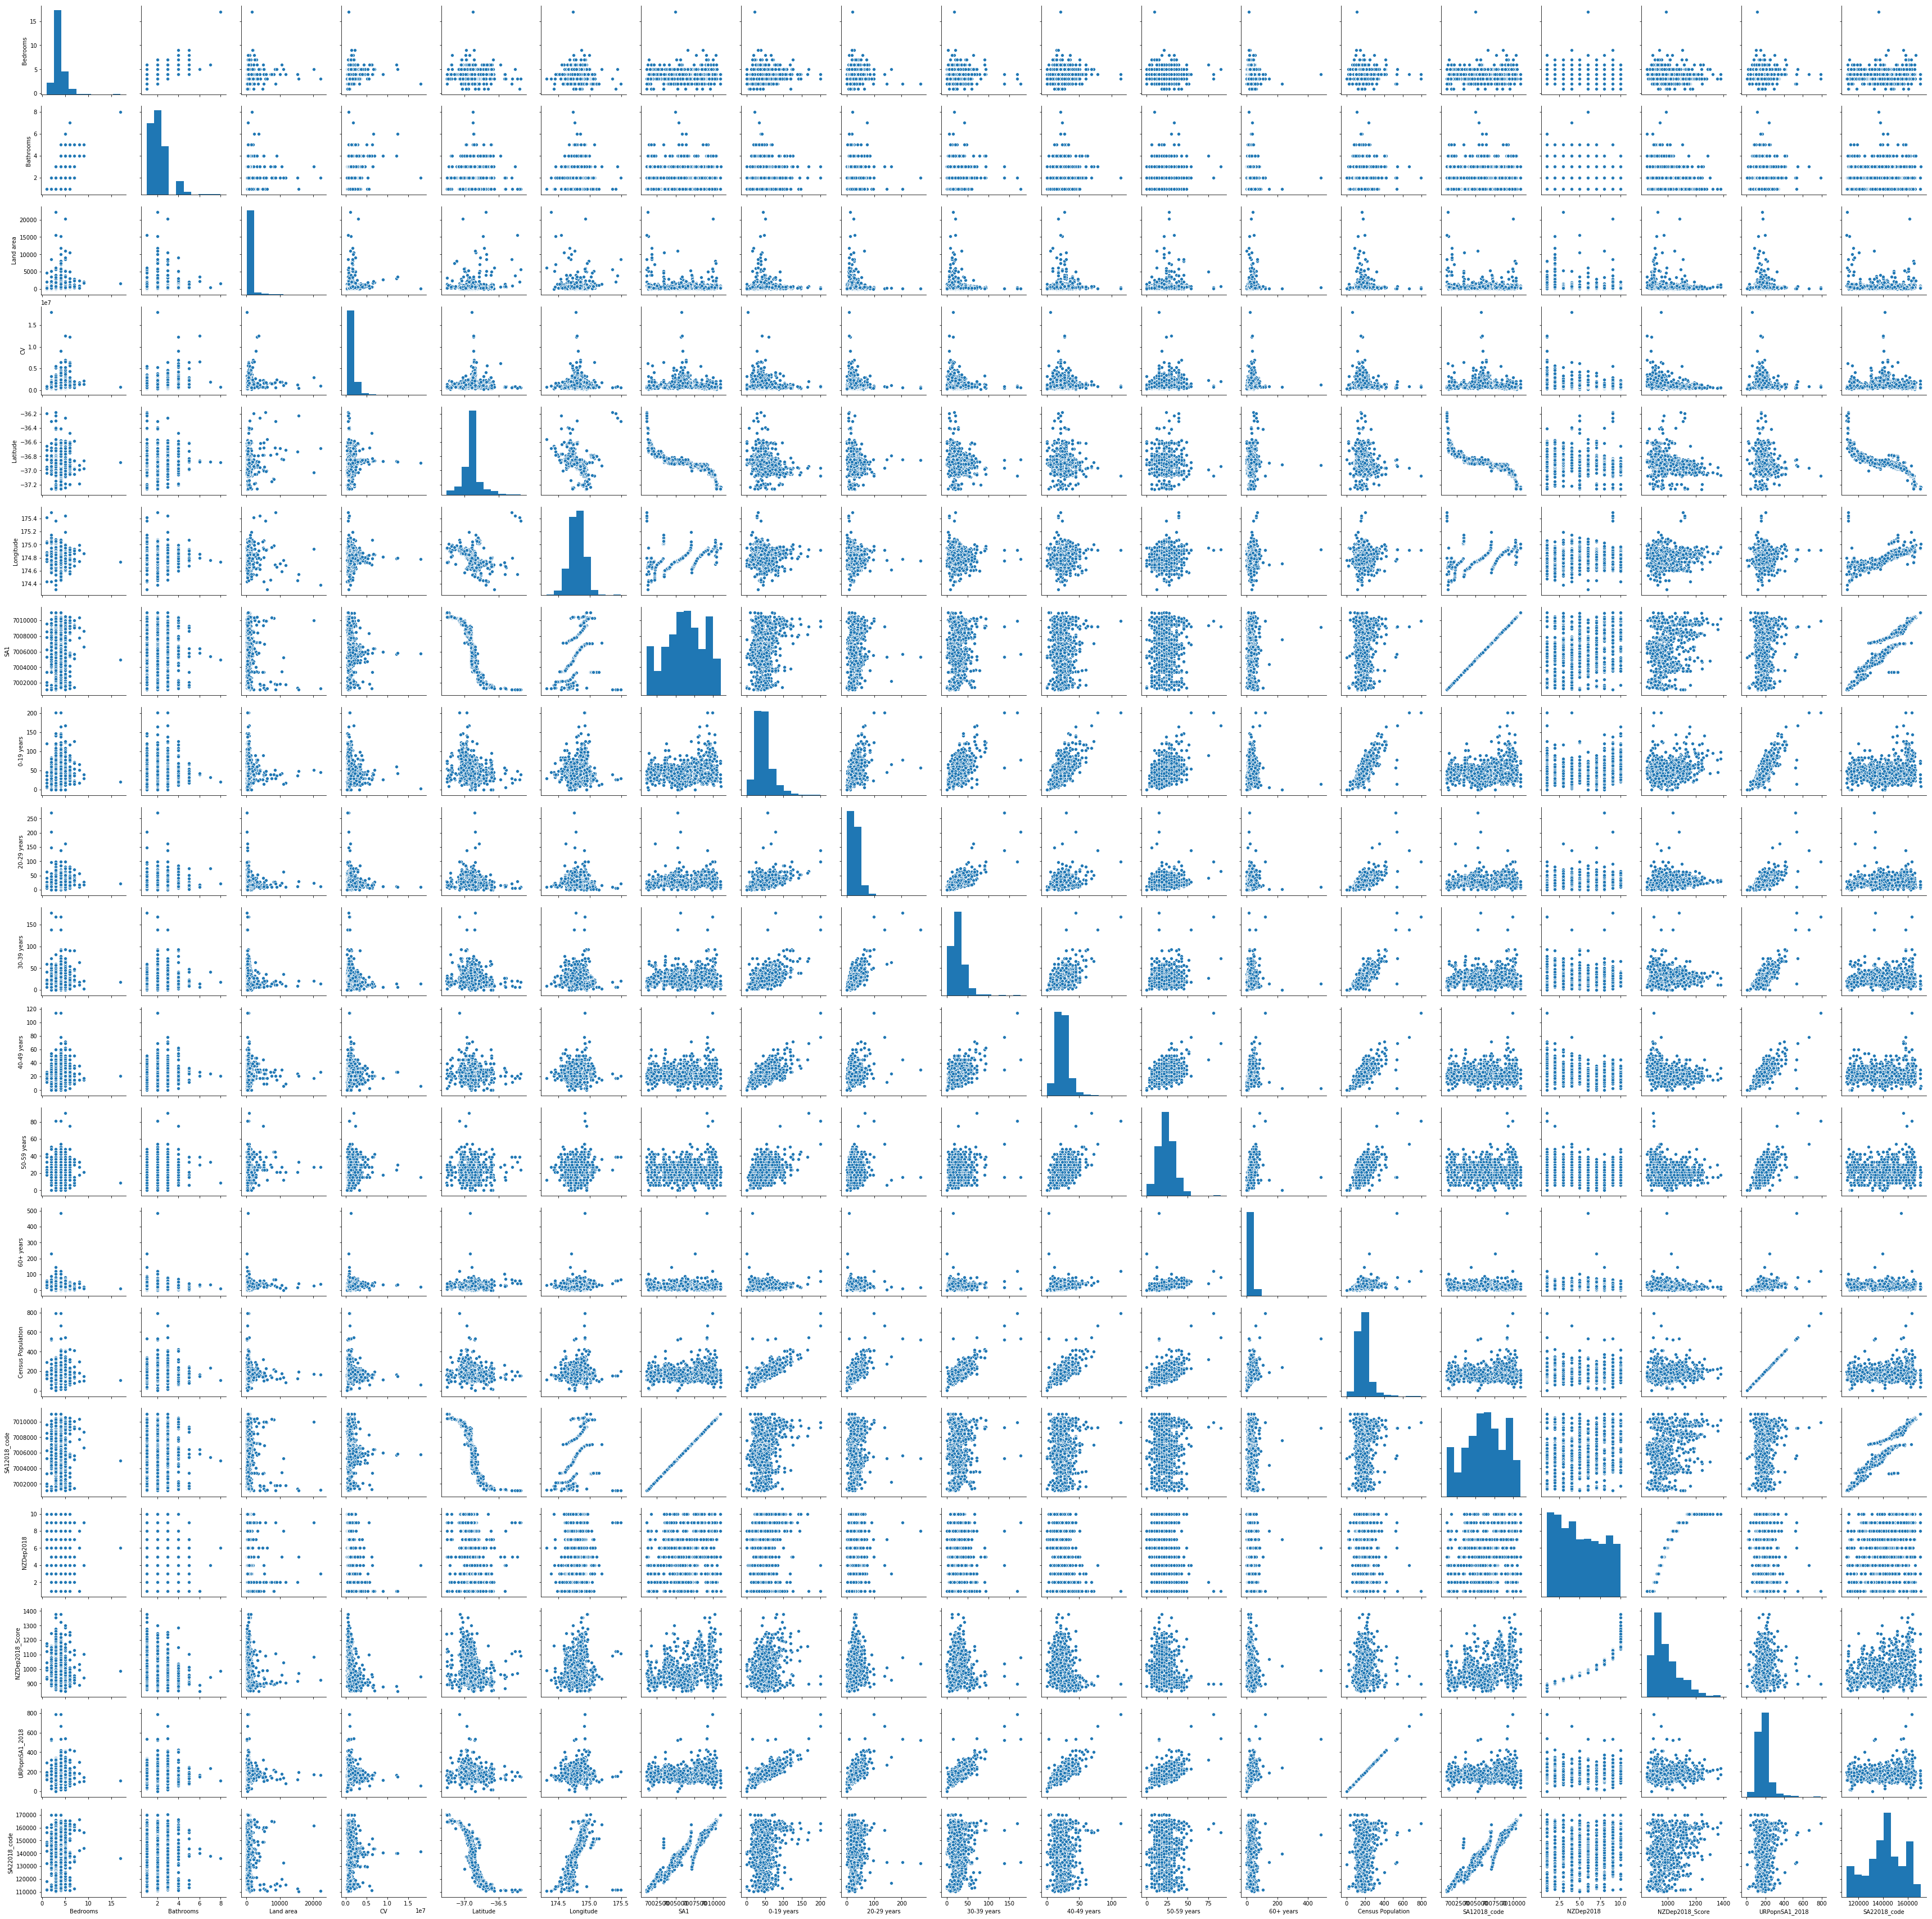

In [65]:
final_df.drop(['SA12018_code'], axis=1)

Bedrooms  Bathrooms                                          Address  \
0            5        3.0        106 Lawrence Crescent Hill Park, Auckland   
1            5        3.0                   8 Corsica Way Karaka, Auckland   
2            6        4.0           243 Harbourside Drive Karaka, Auckland   
3            2        1.0        2/30 Hardington Street Onehunga, Auckland   
4            3        1.0           59 Israel Avenue Clover Park, Auckland   
5            3        1.0       14 Tainui Terrace Mangere Bridge, Auckland   
6            3        1.0            54 Kelmarna Avenue Ponsonby, Auckland   
7            3        2.0          39 Rawhiti Road One Tree Hill, Auckland   
8            3        2.0             17b Tawa Crescent Manurewa, Auckland   
9            4        2.0                39a Keegan Drive Massey, Auckland   
10           4        2.0                39c Keegan Drive Massey, Auckland   
11           4        2.0                39b Keegan Drive Massey, Auckland   
12           3        1.0                9 Menear Lane Hillcrest, Auckland   
13           3        1.0            10 Fairlight Place Manurewa, Auckland   
14           4        2.0               11 Arran Drive Millwater, Auckland   
15           3        1.0   53a Kimber Hall Avenue Mount Roskill, Auckland   
16           2        1.0  1/77 Kimber Hall Avenue Mount Roskill, Auckland   
17           5        3.0     42 Johns Creek Crescent Silverdale, Auckland   
18           5        3.0             4 Ahorangi Road Silverdale, Auckland   
19           5        3.0     32 Johns Creek Crescent Silverdale, Auckland   
20           3        1.0           577 Mt Albert Road Royal Oak, Auckland   
21           5        4.0        109 Aberley Road Schnapper Rock, Auckland   
22           4        2.0               19 Kenley Place Avondale, Auckland   
23           3        1.0            27 Stottholm Road Titirangi, Auckland   
24           3        1.0              71 First Avenue Kingsland, Auckland   
25           3        2.0     17 Dalwhinnie Parade Highland Park, Auckland   
26           3        2.0         24a Roberts Road Matakatia Bay, Auckland   
27           2        1.0      72 Stonefields Avenue Stonefields, Auckland   
28           3        1.0        62 Richardson Road Mount Albert, Auckland   
29           3        2.0        47b Comins Crescent Mission Bay, Auckland   
...        ...        ...                                              ...   
1021         4        3.0                      18a Campbell Road, Auckland   
1022         5        3.0                      62A Maioro Street, Auckland   
1023         5        3.0                         9 Waitara Road, Auckland   
1024         5        3.0                       13B Waitara Road, Auckland   
1025         5        3.0                         5 Waitara Road, Auckland   
1026         4        2.0                      498A Remuera Road, Auckland   
1027         3        1.0                           5 Parry Road, Auckland   
1028         4        2.0                        82 Gowing Drive, Auckland   
1029         6        4.0                          43 Arney Road, Auckland   
1030         4        2.0                         55A Arney Road, Auckland   
1031         3        2.0               Lot 1  6/22 Ngaio Street, Auckland   
1032         4        2.0               167B Blockhouse Bay Road, Auckland   
1033         3        1.0                      133 Mt Smart Road, Auckland   
1034         4        2.0                       67 Balmoral Road, Auckland   
1035         4        2.0                      42B Marion Avenue, Auckland   
1036         5        2.0                       23 Stoddard Road, Auckland   
1037         5        3.0                    246 Victoria Avenue, Auckland   
1038         5        2.0                       23 Wapiti Avenue, Auckland   
1039         5        6.0                       57 Portland Road, Auckland   
1040         5        3.0   

In [114]:
final_df['log Census Population']=np.log10(final_df['Census Population'])
final_df['log CV']=np.log10(final_df['CV'])
final_df1 = final_df.drop(['CV', 'Census Population'], axis=1)

In [115]:
final_df1.head()

Bedrooms  Bathrooms                                    Address  Land area  \
0         5        3.0  106 Lawrence Crescent Hill Park, Auckland      714.0   
1         5        3.0             8 Corsica Way Karaka, Auckland      564.0   
2         6        4.0     243 Harbourside Drive Karaka, Auckland      626.0   
3         2        1.0  2/30 Hardington Street Onehunga, Auckland       65.0   
4         3        1.0     59 Israel Avenue Clover Park, Auckland      601.0   

    Latitude   Longitude      SA1  0-19 years  20-29 years  30-39 years  \
0 -37.012920  174.904069  7009770          48           27           24   
1 -37.063672  174.922912  7009991          42           18           12   
2 -37.063580  174.924044  7009991          42           18           12   
3 -36.912996  174.787425  7007871          42            6           21   
4 -36.979037  174.892612  7008902          93           27           33   

     ...     60+ years      Suburbs  SA12018_code NZDep2018  NZDep2018_Score  \
0    ...            21     Manurewa       7009770       6.0            997.0   
1    ...            30       Karaka       7009991       1.0            881.0   
2    ...            30       Karaka       7009991       1.0            881.0   
3    ...            15     Onehunga       7007871       2.0            908.0   
4    ...            33  Clover Park       7008902       9.0           1091.0   

   URPopnSA1_2018  SA22018_code       SA22018_name  log Census Population  \
0             174        159600     Hillpark North               2.240549   
1             129        162500            Hingaia               2.110590   
2             129        162500            Hingaia               2.110590   
3             120        144300     Onehunga North               2.079181   
4             231        157700  Clover Park North               2.363612   

     log CV  
0  5.982271  
1  6.096910  
2  6.096910  
3  5.869232  
4  5.799341  

[5 rows x 22 columns]

In [71]:
final_df.describe()

Bedrooms    Bathrooms     Land area            CV     Latitude  \
count  1051.000000  1051.000000   1051.000000  1.051000e+03  1051.000000   
mean      3.777355     2.073264    856.989534  1.387521e+06   -36.893715   
std       1.169412     0.992044   1588.156219  1.182939e+06     0.130100   
min       1.000000     1.000000     40.000000  2.700000e+05   -37.265021   
25%       3.000000     1.000000    321.000000  7.800000e+05   -36.950565   
50%       4.000000     2.000000    571.000000  1.080000e+06   -36.893132   
75%       4.000000     3.000000    825.000000  1.600000e+06   -36.855789   
max      17.000000     8.000000  22240.000000  1.800000e+07   -36.177655   

         Longitude           SA1   0-19 years  20-29 years  30-39 years  \
count  1051.000000  1.051000e+03  1051.000000  1051.000000  1051.000000   
mean    174.799325  7.006319e+06    47.549001    28.963844    27.042816   
std       0.119538  2.591262e+03    24.692205    21.037441    17.975408   
min     174.317078  7.001130e+06     0.000000     0.000000     0.000000   
25%     174.720779  7.004416e+06    33.000000    15.000000    15.000000   
50%     174.798575  7.006325e+06    45.000000    24.000000    24.000000   
75%     174.880944  7.008384e+06    57.000000    36.000000    33.000000   
max     175.492424  7.011028e+06   201.000000   270.000000   177.000000   

          ...       50-59 years    60+ years  Census Population  SA12018_code  \
count     ...       1051.000000  1051.000000        1051.000000  1.051000e+03   
mean      ...         22.615604    29.360609         179.914367  7.006319e+06   
std       ...         10.210578    21.805031          71.059280  2.591262e+03   
min       ...          0.000000     0.000000           3.000000  7.001130e+06   
25%       ...         15.000000    18.000000         138.000000  7.004416e+06   
50%       ...         21.000000    27.000000         174.000000  7.006325e+06   
75%       ...         27.000000    36.000000         210.000000  7.008384e+06   
max       ...         90.000000   483.000000         789.000000  7.011028e+06   

         NZDep2018  NZDep2018_Score  URPopnSA1_2018   SA22018_code  \
count  1051.000000      1051.000000     1051.000000    1051.000000   
mean      5.063749       986.503330      179.914367  141527.402474   
std       2.913471        94.287255       71.059280   14666.542775   
min       1.000000       849.000000        3.000000  110400.000000   
25%       2.000000       918.000000      138.000000  132200.000000   
50%       5.000000       959.000000      174.000000  141800.000000   
75%       8.000000      1031.000000      210.000000  152650.000000   
max      10.000000      1380.000000      789.000000  170500.000000   

       log Census Population       log CV  
count            1051.000000  1051.000000  
mean                2.222193     6.060533  
std                 0.184438     0.246023  
min                 0.477121     5.431364  
25%                 2.139879     5.892095  
50%                 2.240549     6.033424  
75%                 2.322219     6.204120  
max                 2.897077     7.255273  

[8 rows x 21 columns]

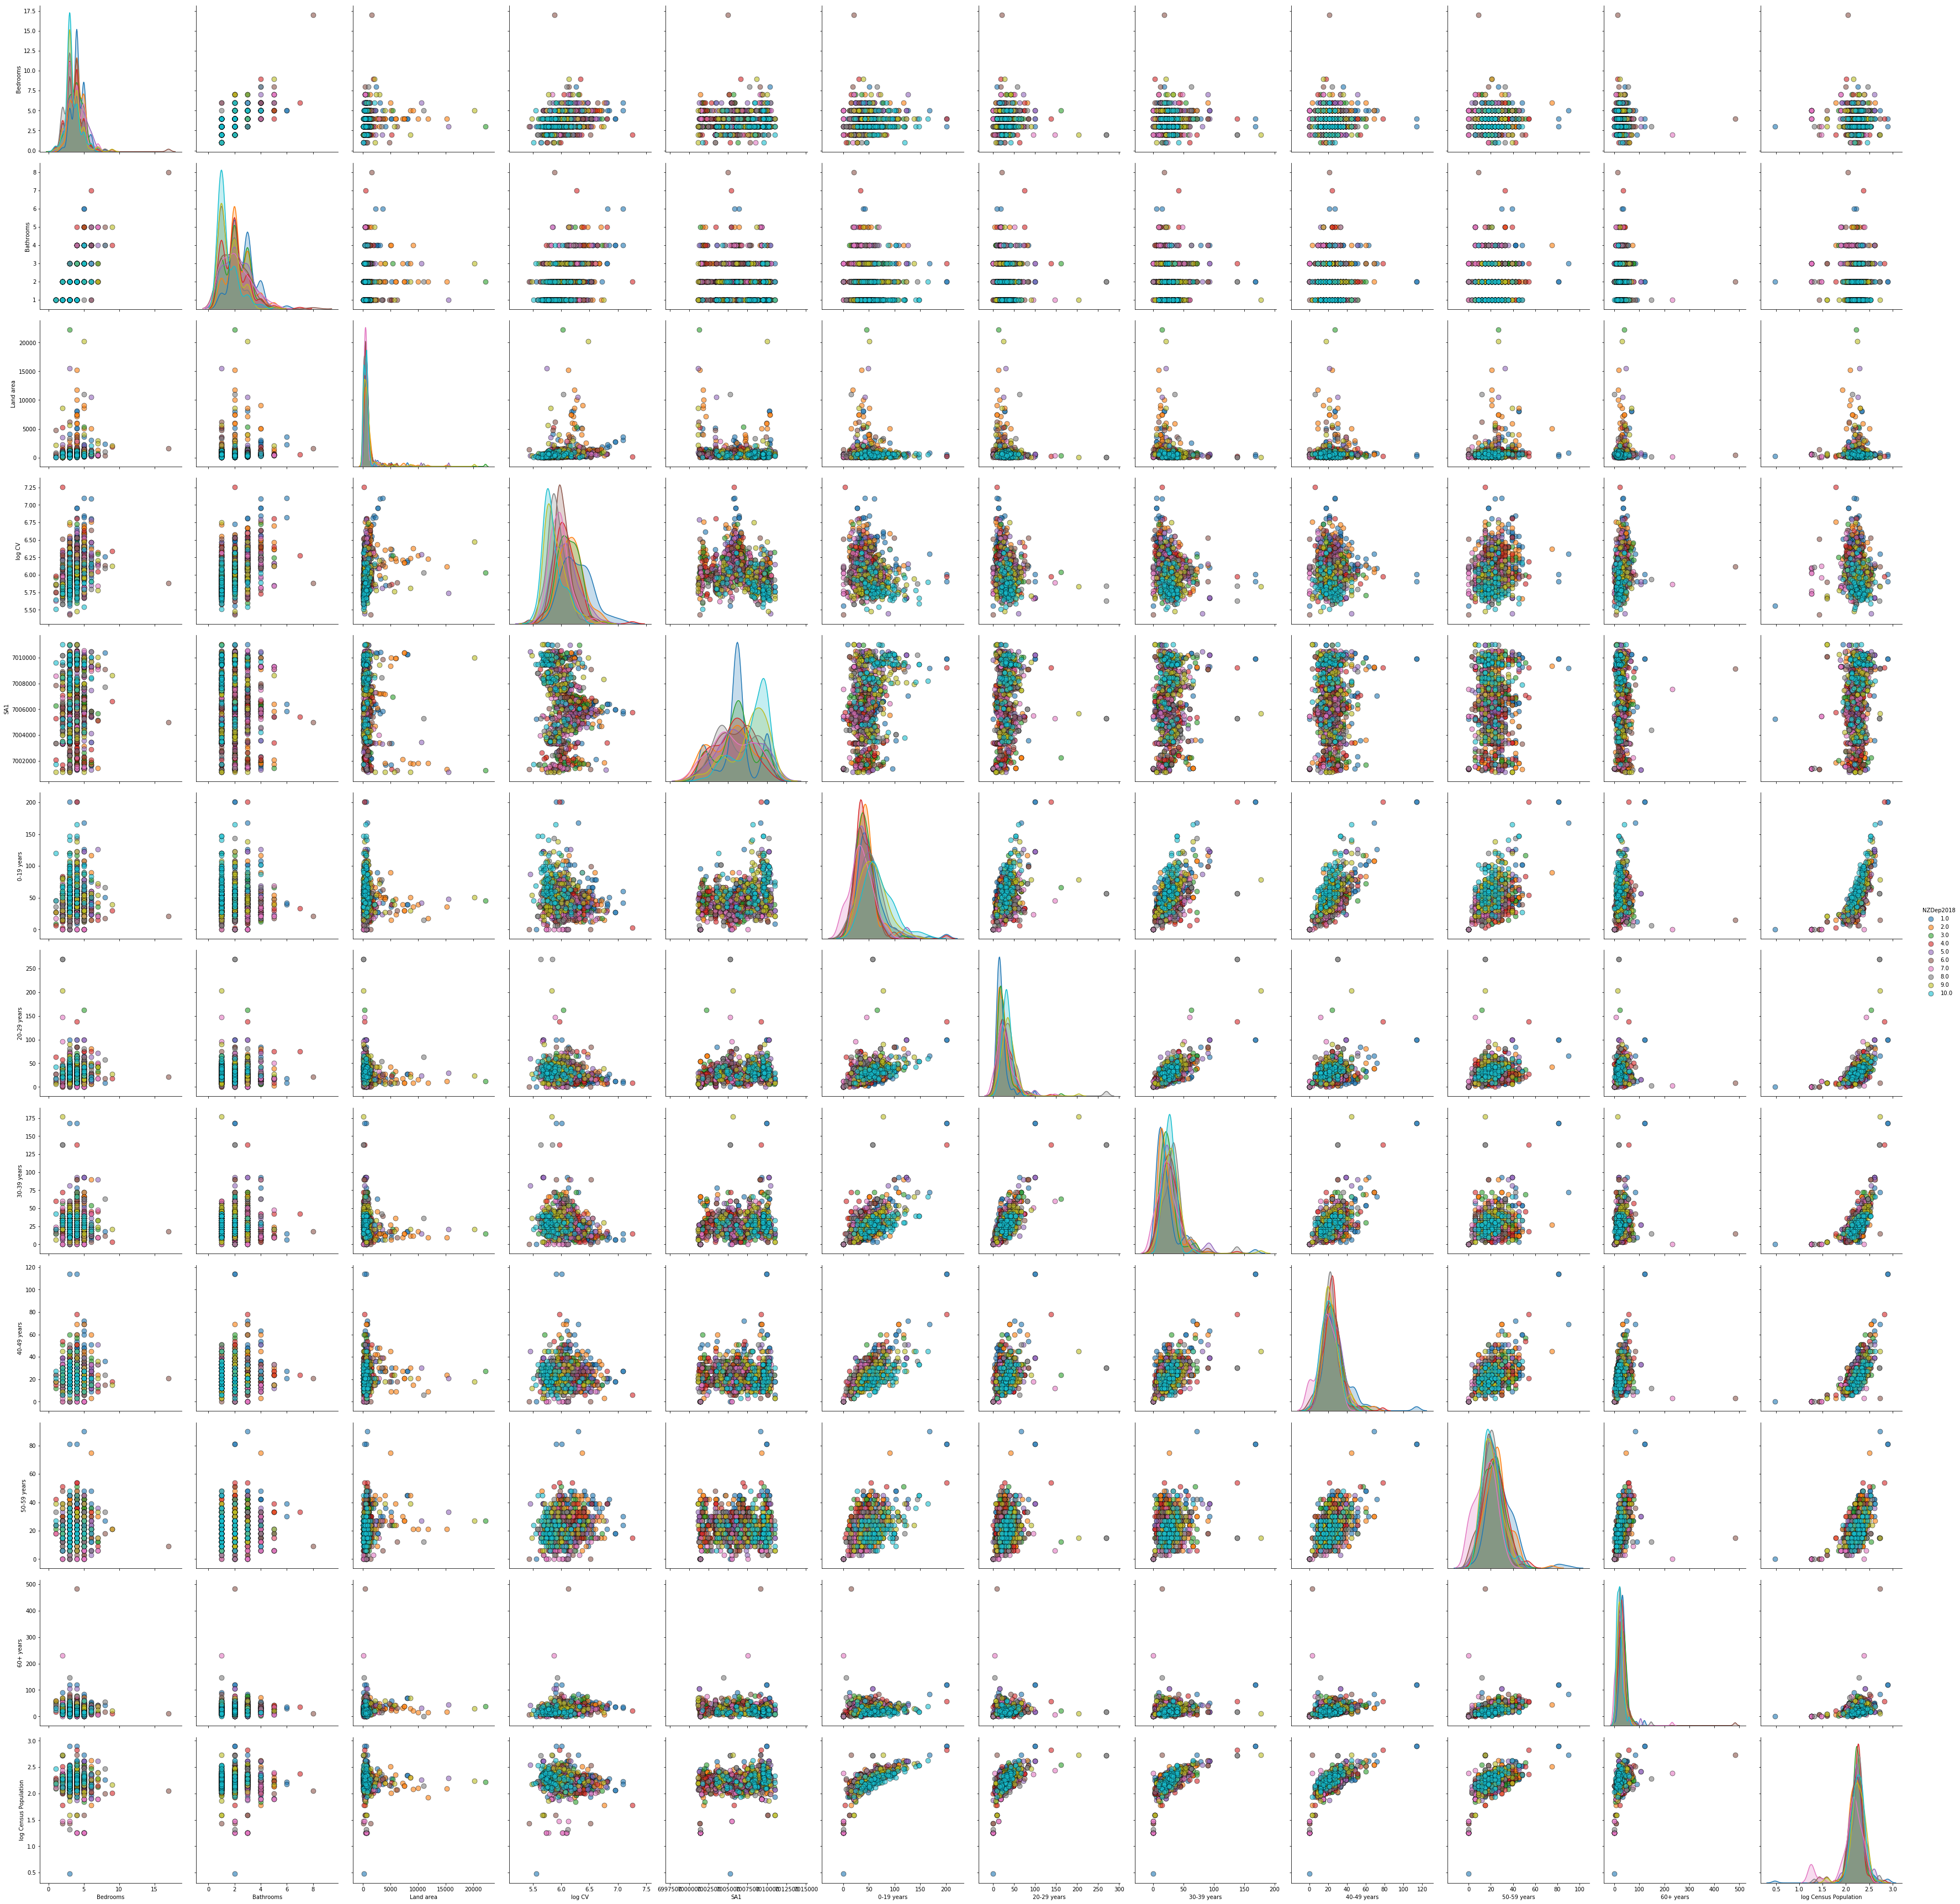

In [185]:
pp = sns.pairplot(final_df1,
             vars = ['Bedrooms', 'Bathrooms', 'Land area', 'log CV', 'SA1', '0-19 years', '20-29 years', '30-39 years', '40-49 years', '50-59 years', '60+ years', 'log Census Population'],
             hue = 'NZDep2018', 
             diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4)
pp.savefig('sample.png')

In [119]:
from scipy.stats import pearsonr

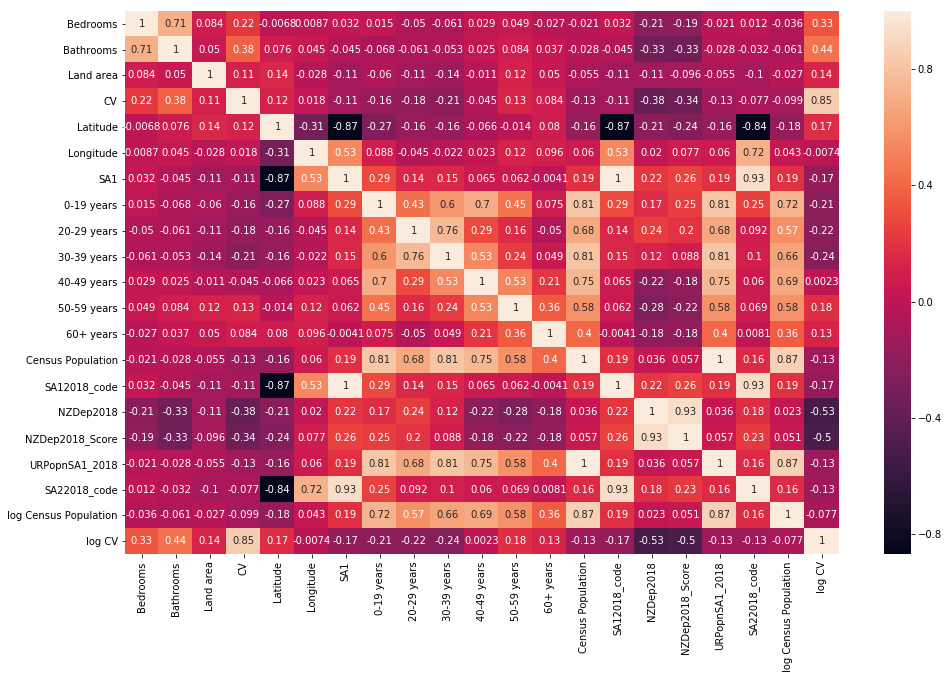

NameError: name 'savefig' is not defined

In [187]:
ax,fig = plt.subplots(figsize=(16,10))
correlation_matrix=final_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
savefig('sample2.png')

In [157]:
from sklearn.model_selection import train_test_split

Log Model

In [158]:
x = final_df1.drop(['log CV','Address', 'Suburbs', 'SA22018_name', 'SA22018_code', 'URPopnSA1_2018', 'Latitude', 'Longitude'],axis=1) 
y = final_df1['log CV']
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=42)

In [159]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x,train_y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [160]:
predicted = model.predict(test_x)

Text(0, 0.5, 'Predicted_CV')

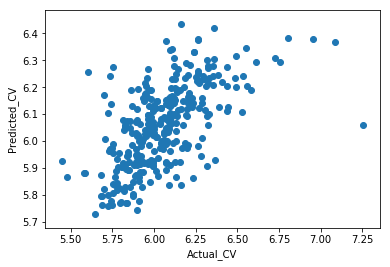

In [161]:
plt.scatter(test_y,predicted)
plt.xlabel('Actual_CV')
plt.ylabel('Predicted_CV')

In [162]:
model.score(test_x,test_y)

0.3739867492027079

Regular  Model

In [143]:
x2 = final_df.drop(['CV','log CV','Address', 'Suburbs', 'SA22018_name', 'SA22018_code', 'URPopnSA1_2018', 'Latitude', 'Longitude', 'log Census Population'],axis=1) 
y2 = final_df['CV']
train_x, test_x, train_y, test_y = train_test_split(x2,y2,test_size=0.3,random_state=42)

In [144]:
model = LinearRegression()
model.fit(train_x,train_y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0, 0.5, 'Predicted_CV')

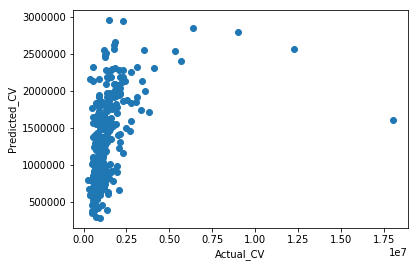

In [145]:
predicted = model.predict(test_x)
plt.scatter(test_y,predicted)
plt.xlabel('Actual_CV')
plt.ylabel('Predicted_CV')

In [146]:
model.score(test_x,test_y)

0.164710254379985